## 5. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
Zdata = 'AnalyticsDataZdata.csv'
Zdata = pd.read_csv(Zdata)

In [3]:
Zdata.head()

,Set,ID,Type,Optsol,LPSol,LagSol,CRank,BDSol,BDRCst,RBDSol,...,RBDSol8,RBDRCst8,BDSol9,BDRCst9,RBDSol9,RBDRCst9,BDSol10,BDRCst10,RBDSol10,RBDRCst10
0,S1,1,z_var,0,0.00,0.07,3,0,-145.89,0.0,...,0.00,145.91,0.0,307.34,0.00,145.85,NaN,NaN,NaN,NaN
1,S1,1,z_var,0,0.00,0.13,9,0,202.89,0.0,...,0.00,490.57,0.0,588.12,0.00,490.55,NaN,NaN,NaN,NaN
2,S1,1,z_var,1,0.77,1.00,1,0,-283.49,0.4,...,0.71,0.00,1.0,213.00,0.71,0.00,NaN,NaN,NaN,NaN
3,S1,1,z_var,0,0.00,0.07,6,0,59.02,0.0,...,0.00,177.96,0.0,431.79,0.00,178.36,NaN,NaN,NaN,NaN
4,S1,1,z_var,0,0.00,0.20,15,0,112.07,0.0,...,0.00,179.40,0.0,361.21,0.00,189.31,NaN,NaN,NaN,NaN


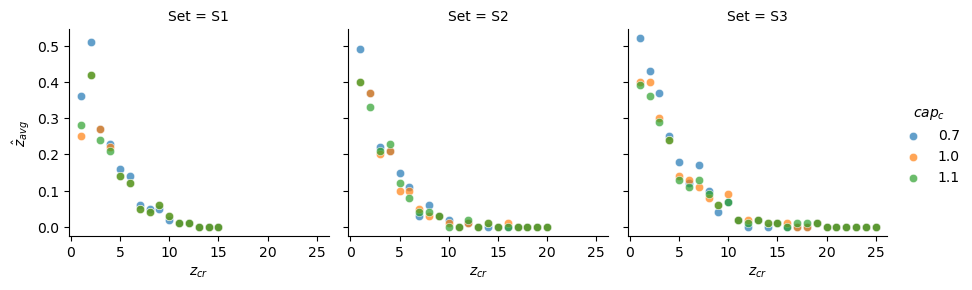

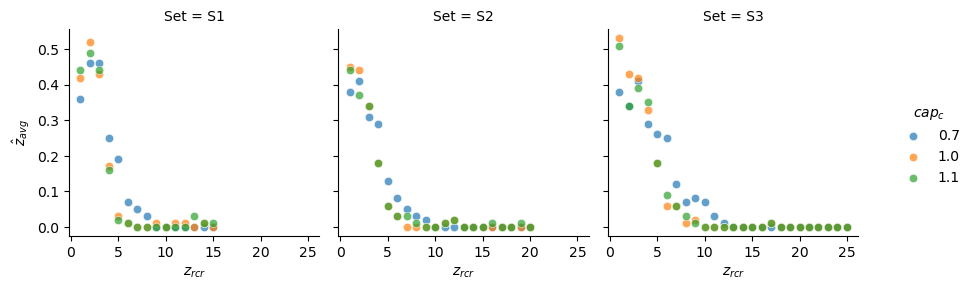

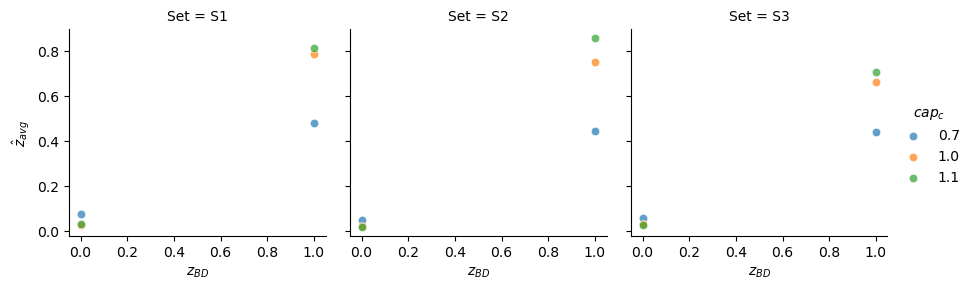

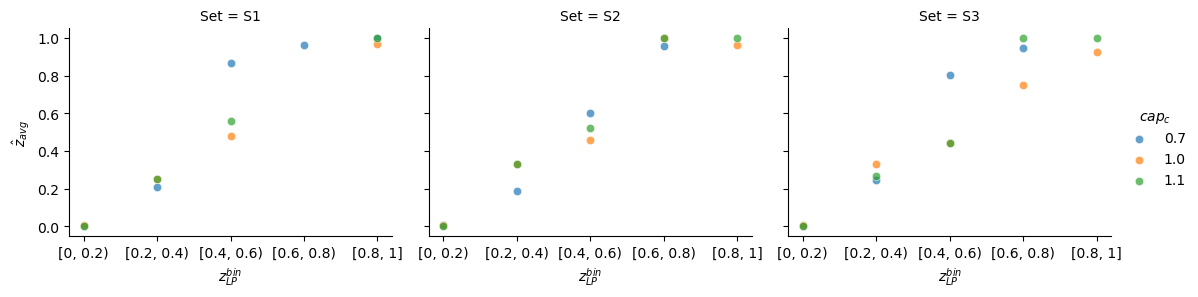

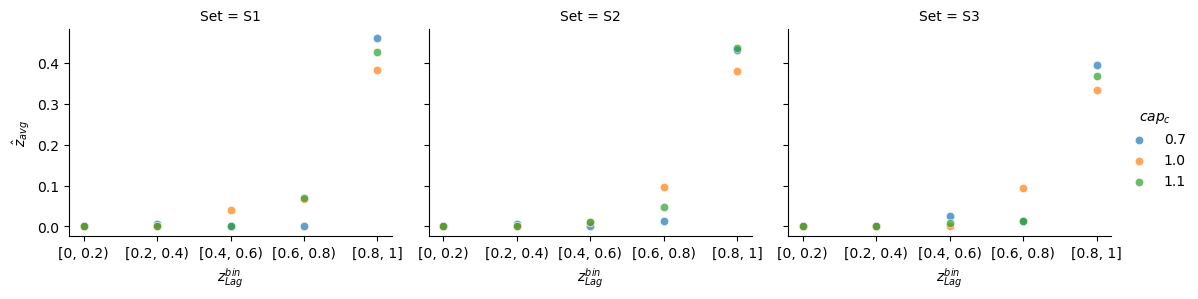

In [4]:
ZdataAVG3 = Zdata.groupby(['Set', 'CRank', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g3 = sns.FacetGrid(ZdataAVG3, col="Set", hue="Cap")
g3.map(sns.scatterplot, "CRank", "Optsol", alpha=.7)
g3.add_legend(title = '$cap_{c}$')
g3.axes[0,0].set_xlabel('$z_{cr}$')
g3.axes[0,1].set_xlabel('$z_{cr}$')
g3.axes[0,2].set_xlabel('$z_{cr}$')
g3.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g3.savefig("Z1Crank.pdf")

Zdata['RBDRCst_rank'] = Zdata.groupby(['Set', 'ID'])['RBDRCst'].rank(method='first', ascending=True)
# BD reduced costs
ZdataAVG = Zdata.groupby(['Set', 'RBDRCst_rank', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g = sns.FacetGrid(ZdataAVG, col="Set", hue="Cap", margin_titles=True)
g.map(sns.scatterplot, "RBDRCst_rank", "Optsol", alpha=.7)
g.add_legend(title = '$cap_{c}$')
g.axes[0,0].set_xlabel('$z_{rcr}$')
g.axes[0,1].set_xlabel('$z_{rcr}$')
g.axes[0,2].set_xlabel('$z_{rcr}$')
g.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g.savefig("Z2RDR.pdf")


ZdataAVG5 = Zdata.groupby(['Set', 'BDSol', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g5 = sns.FacetGrid(ZdataAVG5, col="Set", hue="Cap")
g5.map(sns.scatterplot, "BDSol", "Optsol", alpha=.7)
g5.add_legend(title = '$cap_{c}$')
g5.axes[0,0].set_xlabel('$z_{BD}$')
g5.axes[0,1].set_xlabel('$z_{BD}$')
g5.axes[0,2].set_xlabel('$z_{BD}$')
g5.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g5.savefig("Z3BDsol.pdf")

# LP relaxation
Zdata["LPSolBin"] = Zdata["LPSol"].apply(lambda x: "[0, 0.2)" if x < 0.2 else ("[0.2, 0.4)"  
                                 if x<0.4 else ("[0.4, 0.6)"  if x<0.6 else ("[0.6, 0.8)"  if x<0.8 else "[0.8, 1]" )) ) )
ZdataAVG2 = Zdata.groupby(['Set', 'LPSolBin', 'Cap'])['Optsol'].mean().reset_index()
g2 = sns.FacetGrid(ZdataAVG2, col="Set", hue="Cap", height=3, aspect=1.25)
g2.map(sns.scatterplot, "LPSolBin", "Optsol", alpha=.7)
g2.add_legend(title = '$cap_{c}$')
g2.axes[0,0].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,1].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,2].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g2.savefig("Z4LPSol.pdf")


# Lag relaxation
Zdata["LagSolBin"] = Zdata["LagSol"].apply(lambda x: "[0, 0.2)" if x < 0.2 else ("[0.2, 0.4)"  
                                 if x<0.4 else ("[0.4, 0.6)"  if x<0.6 else ("[0.6, 0.8)"  if x<0.8 else "[0.8, 1]" )) ) )
ZdataAVG4 = Zdata.groupby(['Set', 'LagSolBin', 'Cap'])['Optsol'].mean().reset_index()
g4 = sns.FacetGrid(ZdataAVG4, col="Set", hue="Cap", height=3, aspect=1.25)
g4.map(sns.scatterplot, "LagSolBin", "Optsol", alpha=.7)
g4.add_legend(title = '$cap_{c}$')
g4.axes[0,0].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,1].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,2].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g4.savefig("Z5Lagbin.pdf")



In [5]:
########### Logistic Regression Modeling for Z (iter 5)
Zdata["RC_rank_pct"] = Zdata.apply(lambda x: x['RBDRCst_rank']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank']/20 if x['Set'] == "S2" else x['RBDRCst_rank']/25), axis=1)
Zdata["RC_rank_pct_round"] = Zdata["RC_rank_pct"].round(1)
Zdata["C_rank_pct"] = Zdata.apply(lambda x: x['CRank']/15 if x['Set'] == "S1" 
                                    else (x['CRank']/20 if x['Set'] == "S2" else x['CRank']/25), axis=1)
Zdata["C_rank_pct_round"] = Zdata["C_rank_pct"].round(1)
Zdata["RC_rank_pct_round"] = np.where(Zdata["RC_rank_pct_round"] >= 0.5, 0.5, Zdata["RC_rank_pct_round"] )
Zdata["C_rank_pct_round"] = np.where(Zdata["C_rank_pct_round"] >= 0.5, 0.5, Zdata["C_rank_pct_round"] )

ZdataLowCap = Zdata.loc[Zdata["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata.loc[Zdata["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C(BDSol, Treatment(reference=0)) + RC_rank_pct_round", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata.loc[Zdata["Cap"] == 1.1] 
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C(BDSol, Treatment(reference=0)) + C_rank_pct_round", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)



Optimization terminated successfully.
         Current function value: 0.082595
         Iterations 12
0.965
[[1623   19]
 [  44  114]]
0.9856727670793568
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7499
Time:                        11:36:19   Log-Likelihood:                -346.90
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0824      0.93

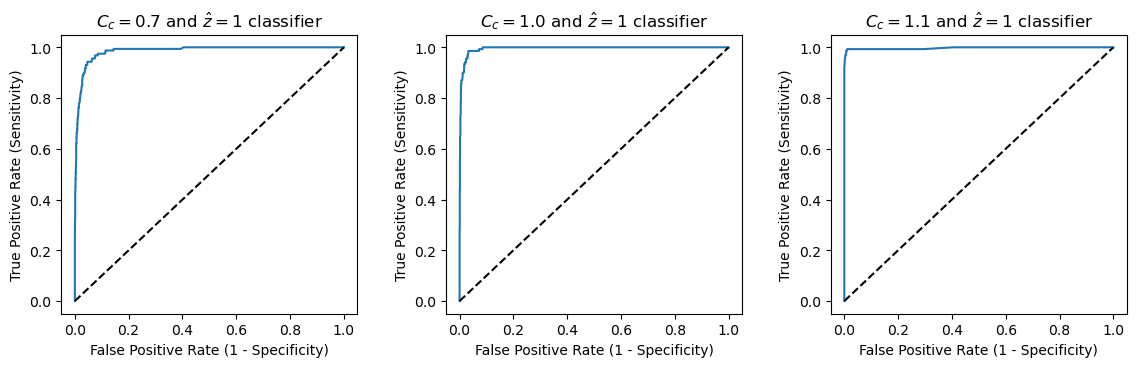

In [6]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(12)
fig.tight_layout(pad=3.3)
axs[0].plot(ZdataLowCap_fpr, ZdataLowCap_tpr)
axs[0].plot([0,1], [0,1], 'k--' )
axs[0].set_title('$C_c = 0.7$ and $\hat{z} = 1$ classifier')
axs[1].plot(ZdataMediumCap_fpr, ZdataMediumCap_tpr)
axs[1].plot([0,1], [0,1], 'k--' )
axs[1].set_title('$C_c = 1.0$ and $\hat{z} = 1$ classifier')
axs[2].plot(ZdataHighCap_fpr, ZdataHighCap_tpr)
axs[2].plot([0,1], [0,1], 'k--' )
axs[2].set_title('$C_c = 1.1$ and $\hat{z} = 1$ classifier')
for ax in axs.flat:
    ax.set(xlabel='False Positive Rate (1 - Specificity)', ylabel='True Positive Rate (Sensitivity)')
plt.savefig("ROC.pdf")

In [7]:
########### Logistic Regression Modeling for Z (iter 1)
ZdataLowCap = Zdata.loc[Zdata["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata.loc[Zdata["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata.loc[Zdata["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)

Optimization terminated successfully.
         Current function value: 0.082595
         Iterations 12
0.965
[[1623   19]
 [  44  114]]
0.9856727670793568
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7499
Time:                        11:36:22   Log-Likelihood:                -346.90
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0824      0.93

In [8]:
########### Logistic Regression Modeling for Z (iter 2)

Zdata['RBDRCst_rank_iter2'] = Zdata.groupby(['Set', 'ID'])['RBDRCst2'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter2"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter2']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter2']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter2']/25), axis=1)
Zdata["RC_rank_pct_round_iter2"] = Zdata["RC_rank_pct_iter2"].round(1)
Zdata["RC_rank_pct_round_iter2"] = np.where(Zdata["RC_rank_pct_round_iter2"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter2"] )

Zdata2 = Zdata[Zdata['RBDRCst_rank_iter2'].notnull()] 

ZdataLowCap = Zdata2.loc[Zdata2["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
#log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol2, Treatment(reference=0)) + RC_rank_pct_round_iter2 ", data=ZdataLowCap_train).fit()
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + RC_rank_pct_round_iter2 ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata2.loc[Zdata2["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol2, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata2.loc[Zdata2["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)

Optimization terminated successfully.
         Current function value: 0.081343
         Iterations 11
0.9633333333333334
[[1618   24]
 [  42  116]]
0.9856920396552522
0.9633333333333334
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4195
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7537
Time:                        11:36:23   Log-Likelihood:                -341.64
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [9]:
########### Logistic Regression Modeling for Z (iter 3)

Zdata['RBDRCst_rank_iter3'] = Zdata.groupby(['Set', 'ID'])['RBDRCst3'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter3"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter3']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter3']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter3']/25), axis=1)
Zdata["RC_rank_pct_round_iter3"] = Zdata["RC_rank_pct_iter3"].round(1)
Zdata["RC_rank_pct_round_iter3"] = np.where(Zdata["RC_rank_pct_round_iter3"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter3"] )

Zdata3 = Zdata[Zdata['RBDRCst_rank_iter3'].notnull()]

ZdataLowCap = Zdata3.loc[Zdata3["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata3.loc[Zdata3["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol3, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata3.loc[Zdata3["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)


Optimization terminated successfully.
         Current function value: 0.082595
         Iterations 12
0.965
[[1623   19]
 [  44  114]]
0.9856727670793568
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7499
Time:                        11:36:25   Log-Likelihood:                -346.90
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0824      0.93

In [10]:
########### Logistic Regression Modeling for Z (iter 4)

Zdata['RBDRCst_rank_iter4'] = Zdata.groupby(['Set', 'ID'])['RBDRCst4'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter4"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter4']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter4']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter4']/25), axis=1)
Zdata["RC_rank_pct_round_iter4"] = Zdata["RC_rank_pct_iter4"].round(1)
Zdata["RC_rank_pct_round_iter4"] = np.where(Zdata["RC_rank_pct_round_iter4"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter4"] )

Zdata4 = Zdata[Zdata['RBDRCst_rank_iter4'].notnull()]

ZdataLowCap = Zdata4.loc[Zdata4["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata4.loc[Zdata4["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol4, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata4.loc[Zdata4["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)

Optimization terminated successfully.
         Current function value: 0.082595
         Iterations 12
0.965
[[1623   19]
 [  44  114]]
0.9856727670793568
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7499
Time:                        11:36:27   Log-Likelihood:                -346.90
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0824      0.93

In [11]:
########### Logistic Regression Modeling for Z (iter 6)

Zdata['RBDRCst_rank_iter6'] = Zdata.groupby(['Set', 'ID'])['RBDRCst6'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter6"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter6']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter6']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter6']/25), axis=1)
Zdata["RC_rank_pct_round_iter6"] = Zdata["RC_rank_pct_iter6"].round(1)
Zdata["RC_rank_pct_round_iter6"] = np.where(Zdata["RC_rank_pct_round_iter6"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter6"] )

Zdata6 = Zdata[Zdata['RBDRCst_rank_iter6'].notnull()]

ZdataLowCap = Zdata6.loc[Zdata6["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol6, Treatment(reference=0)) ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata6.loc[Zdata6["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol6, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata6.loc[Zdata6["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round + C(BDSol6, Treatment(reference=0))", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)




Optimization terminated successfully.
         Current function value: 0.082121
         Iterations 12
0.965
[[1621   21]
 [  42  116]]
0.9855012411538876
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4195
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7514
Time:                        11:36:30   Log-Likelihood:                -344.91
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [12]:
########### Logistic Regression Modeling for Z (iter 7)

Zdata['RBDRCst_rank_iter7'] = Zdata.groupby(['Set', 'ID'])['RBDRCst7'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter7"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter7']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter7']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter7']/25), axis=1)
Zdata["RC_rank_pct_round_iter7"] = Zdata["RC_rank_pct_iter7"].round(1)
Zdata["RC_rank_pct_round_iter7"] = np.where(Zdata["RC_rank_pct_round_iter7"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter7"] )

Zdata7 = Zdata[Zdata['RBDRCst_rank_iter7'].notnull()]

ZdataLowCap = Zdata7.loc[Zdata7["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata7.loc[Zdata7["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol7, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata7.loc[Zdata7["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C_rank_pct_round + C(BDSol7, Treatment(reference=0))", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)

Optimization terminated successfully.
         Current function value: 0.082595
         Iterations 12
0.965
[[1623   19]
 [  44  114]]
0.9856727670793568
0.965
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4200
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7499
Time:                        11:36:31   Log-Likelihood:                -346.90
converged:                       True   LL-Null:                       -1387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0824      0.93

In [13]:
########### Logistic Regression Modeling for Z (iter 8)

Zdata['RBDRCst_rank_iter8'] = Zdata.groupby(['Set', 'ID'])['RBDRCst8'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter8"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter8']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter8']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter8']/25), axis=1)
Zdata["RC_rank_pct_round_iter8"] = Zdata["RC_rank_pct_iter8"].round(1)
Zdata["RC_rank_pct_round_iter8"] = np.where(Zdata["RC_rank_pct_round_iter8"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter8"] )

Zdata8 = Zdata[Zdata['RBDRCst_rank_iter8'].notnull()]

ZdataLowCap = Zdata8.loc[Zdata8["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol8, Treatment(reference=0)) ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata8.loc[Zdata8["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol8, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata8.loc[Zdata8["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C(BDSol8, Treatment(reference=0))", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)


Optimization terminated successfully.
         Current function value: 0.078192
         Iterations 12
0.9659408151870463
[[1600   20]
 [  41  130]]
0.9836528048516352
0.9659408151870463
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4179
Model:                          Logit   Df Residuals:                     4174
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7587
Time:                        11:36:33   Log-Likelihood:                -326.76
converged:                       True   LL-Null:                       -1354.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [14]:
########### Logistic Regression Modeling for Z (iter 9)

Zdata['RBDRCst_rank_iter9'] = Zdata.groupby(['Set', 'ID'])['RBDRCst9'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter9"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter9']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter9']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter9']/25), axis=1)
Zdata["RC_rank_pct_round_iter9"] = Zdata["RC_rank_pct_iter9"].round(1)
Zdata["RC_rank_pct_round_iter9"] = np.where(Zdata["RC_rank_pct_round_iter9"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter9"] )

Zdata9 = Zdata[Zdata['RBDRCst_rank_iter9'].notnull()]

ZdataLowCap = Zdata9.loc[Zdata9["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol9, Treatment(reference=0)) ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata9.loc[Zdata9["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C(BDSol9, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata9.loc[Zdata9["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C(BDSol9, Treatment(reference=0))", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)


Optimization terminated successfully.
         Current function value: 0.082284
         Iterations 12
0.9651880965749579
[[1588   19]
 [  43  131]]
0.9871521146707294
0.9651880965749579
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 4154
Model:                          Logit   Df Residuals:                     4149
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7451
Time:                        11:36:35   Log-Likelihood:                -341.81
converged:                       True   LL-Null:                       -1340.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [15]:
########### Logistic Regression Modeling for Z (iter 10)

Zdata['RBDRCst_rank_iter10'] = Zdata.groupby(['Set', 'ID'])['RBDRCst10'].rank(method='first', ascending=True)
Zdata["RC_rank_pct_iter10"] = Zdata.apply(lambda x: x['RBDRCst_rank_iter10']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank_iter10']/20 if x['Set'] == "S2" else x['RBDRCst_rank_iter10']/25), axis=1)
Zdata["RC_rank_pct_round_iter10"] = Zdata["RC_rank_pct_iter10"].round(1)
Zdata["RC_rank_pct_round_iter10"] = np.where(Zdata["RC_rank_pct_round_iter10"] >= 0.5, 0.5, Zdata["RC_rank_pct_round_iter10"] )

Zdata10 = Zdata[Zdata['RBDRCst_rank_iter10'].notnull()]

ZdataLowCap = Zdata10.loc[Zdata10["Cap"] == 0.7]
ZdataLowCap_train, ZdataLowCap_test = train_test_split(ZdataLowCap, test_size=0.3, random_state=1)
ZdataLowCap_train = pd.DataFrame(data=ZdataLowCap_train, columns=ZdataLowCap.columns)
ZdataLowCap_test = pd.DataFrame(data=ZdataLowCap_test, columns=ZdataLowCap.columns)
log_reg_Lowcap = smf.logit("Optsol ~ LPSol + LagSol + C_rank_pct_round + C(BDSol10, Treatment(reference=0)) ", data=ZdataLowCap_train).fit()
# Create predictions using the log_reg_Lowcap model on the test set
ZdataLowCap_test['pred'] = log_reg_Lowcap.predict(ZdataLowCap_test)
ZdataLowCap_test['pred_class'] = np.where(ZdataLowCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.confusion_matrix(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred_class))
print (metrics.roc_auc_score(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred))
print (sum(ZdataLowCap_test.pred_class == ZdataLowCap_test.Optsol) / float(len(ZdataLowCap_test)))
print(log_reg_Lowcap.summary())
ZdataLowCap_fpr, ZdataLowCap_tpr, ZdataLowCap_thresholds = metrics.roc_curve(ZdataLowCap_test.Optsol, ZdataLowCap_test.pred)


ZdataMediumCap = Zdata10.loc[Zdata10["Cap"] == 1.0]
ZdataMediumCap_train, ZdataMediumCap_test = train_test_split(ZdataMediumCap, test_size=0.3, random_state=1)
ZdataMediumCap_train = pd.DataFrame(data=ZdataMediumCap_train, columns=ZdataMediumCap.columns)
ZdataMediumCap_test = pd.DataFrame(data=ZdataMediumCap_test, columns=ZdataMediumCap.columns)
log_reg_Mediumcap = smf.logit("Optsol ~ LPSol + LagSol + C(BDSol10, Treatment(reference=0))", data=ZdataMediumCap_train).fit()
# Create predictions using the log_reg_Mediumcap model on the test set
ZdataMediumCap_test['pred'] = log_reg_Mediumcap.predict(ZdataMediumCap_test)
ZdataMediumCap_test['pred_class'] = np.where(ZdataMediumCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.confusion_matrix(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred_class))
print (metrics.roc_auc_score(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred))
print (sum(ZdataMediumCap_test.pred_class == ZdataMediumCap_test.Optsol) / float(len(ZdataMediumCap_test)))
print(log_reg_Mediumcap.summary())
ZdataMediumCap_fpr, ZdataMediumCap_tpr, ZdataMediumCap_thresholds = metrics.roc_curve(ZdataMediumCap_test.Optsol, ZdataMediumCap_test.pred)


ZdataHighCap = Zdata10.loc[Zdata10["Cap"] == 1.1]
ZdataHighCap_train, ZdataHighCap_test = train_test_split(ZdataHighCap, test_size=0.3, random_state=1)
ZdataHighCap_train = pd.DataFrame(data=ZdataHighCap_train, columns=ZdataHighCap.columns)
ZdataHighCap_test = pd.DataFrame(data=ZdataHighCap_test, columns=ZdataHighCap.columns)
log_reg_Highcap = smf.logit("Optsol ~ LPSol + C(BDSol10, Treatment(reference=0))", data=ZdataHighCap_train).fit()
# Create predictions using the log_reg_Highcap model on the test set
ZdataHighCap_test['pred'] = log_reg_Highcap.predict(ZdataHighCap_test)
ZdataHighCap_test['pred_class'] = np.where(ZdataHighCap_test['pred'] >= 0.5, 1, 0)
print (metrics.accuracy_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.confusion_matrix(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred_class))
print (metrics.roc_auc_score(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred))
print (sum(ZdataHighCap_test.pred_class == ZdataHighCap_test.Optsol) / float(len(ZdataHighCap_test)))
print(log_reg_Highcap.summary())
ZdataHighCap_fpr, ZdataHighCap_tpr, ZdataHighCap_thresholds = metrics.roc_curve(ZdataHighCap_test.Optsol, ZdataHighCap_test.pred)


Optimization terminated successfully.
         Current function value: 0.087664
         Iterations 11
0.9703264094955489
[[1507   18]
 [  32  128]]
0.9890799180327869
0.9703264094955489
                           Logit Regression Results                           
Dep. Variable:                 Optsol   No. Observations:                 3929
Model:                          Logit   Df Residuals:                     3924
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7308
Time:                        11:36:37   Log-Likelihood:                -344.43
converged:                       True   LL-Null:                       -1279.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------